In [6]:
import seaborn as sns
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

sns.set_theme(style="darkgrid")

In [7]:
# THIS LOADS THE RIGHT DATA IN THE RIGHT SHAPE
simulation_mean_df = pd.read_json('RESULTS_Multimodal_Model.json')
simulation_mean_df = simulation_mean_df.iloc[1:]
num_rows, num_cols = simulation_mean_df.shape

print("Number of rows:", num_rows)
print("Number of columns:", num_cols)

simulation_mean_df.head()



Number of rows: 19
Number of columns: 100


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
1,0.545192,0.489348,0.572366,0.490886,0.559396,0.559396,0.492450,0.44321,0.611404,0.611404,...,0.504487,0.486757,0.486757,0.566822,0.505908,0.593431,0.437753,0.437753,0.582271,0.539097
2,0.512438,0.476524,0.472686,0.474320,0.540619,0.540619,0.449279,0.44201,0.464637,0.464637,...,0.477263,0.472285,0.529054,0.529054,0.499636,0.571453,0.419497,0.419497,0.566616,0.495057
3,0.503162,0.472807,0.452908,0.468417,0.533197,0.533197,0.485783,0.44201,0.454359,0.454359,...,0.465502,0.469481,0.514113,0.514113,0.499224,0.564391,0.413880,0.560115,0.560115,0.486899
4,0.500730,0.471972,0.443408,0.466580,0.531759,0.531759,0.478153,0.44201,0.451134,0.451134,...,0.459704,0.469057,0.508911,0.508911,0.499224,0.563125,0.411809,0.557278,0.557278,0.484624
5,0.500449,0.471873,0.438320,0.466458,0.531496,0.474355,0.474355,0.44201,0.450387,0.501390,...,0.457653,0.469057,0.506830,0.506830,0.499224,0.563011,0.411527,0.556400,0.556400,0.484172


In [8]:
# The following plot shows the waiting times for all the festival goers for each number of servers in the system

df_melted = pd.melt(simulation_mean_df, value_name="Average Waiting Time", ignore_index=False)
# sns.scatterplot(data=df_melted, x=df_melted.index, y="Waiting Time")
 # this switches the x-axis labels to strat from 1 instead of 0

print(df_melted)

print(df_melted.index)



    variable  Average Waiting Time
1          0              0.545192
2          0              0.512438
3          0              0.503162
4          0              0.500730
5          0              0.500449
..       ...                   ...
15        99              0.484161
16        99              0.484161
17        99              0.484161
18        99              0.554673
19        99              0.554673

[1900 rows x 2 columns]
Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10,
       ...
       10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
      dtype='int64', length=1900)


In [9]:
df_melted.index = df_melted.index + 1
# to switch the start on the axis to 1 instead of zero, only run ONCE

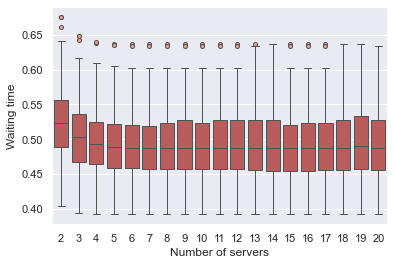

0.527330883953
0.507423119129
0.499586454251
0.49709597750299994
0.4946734560299999
0.4935492763910001
0.4957472592520001
0.4953189071810001
0.4946635443040001
0.49624187934200015
0.4959429557930001
0.49352868396000005
0.49280196551500005
0.4921611010660001
0.4928553744070001
0.4943317939750001
0.4949696575620001
0.4975588361060001
0.4935925393890001


IndexError: single positional indexer is out-of-bounds

In [10]:
ax = sns.boxplot(data=df_melted, x=df_melted.index, y="Average Waiting Time", color="#c94c4c",  flierprops=dict( marker='o', markersize=4, markerfacecolor="#eea29a"))


#xticks_interval = 4
#labels = ax.get_xticks()[::xticks_interval] 
#ax.set_xticks(labels)

#plt.title("Multi-server Normal Distribution Model: distribution of the waiting times for festival goers per number of servers")
#plt.title("Distribution of Waiting Times for Festival Goers Generated by the Normal Distribution Model")
plt.xlabel("Number of servers")
plt.ylabel("Waiting time")

plt.show()

for row in simulation_mean_df:
    print(np.mean(simulation_mean_df.iloc[row]))

<Figure size 720x504 with 0 Axes>

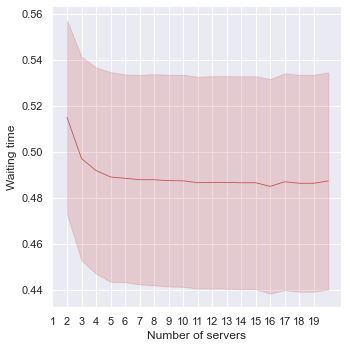

In [ ]:
plt.figure(figsize=(10, 7))
sns.relplot(x=df_melted.index, y="Average Waiting Time", 
             data=df_melted, kind="line", errorbar="sd", color="#c94c4c", linewidth=0.8) #color="#034f84") HOW MANY STANDARD DEVIATIONS -> ONE FROM THE MEAN

#plt.title("Multi-server Normal Distribution Model: mean and standard deviation of the waiting times for festival goers")
#plt.title("Distribution of Waiting Times for Festival Goers generated by the Normal Distribution Model")
plt.xlabel("Number of servers")
plt.ylabel("Waiting time")
plt.xticks(np.arange(1, 20, 1))
plt.show()

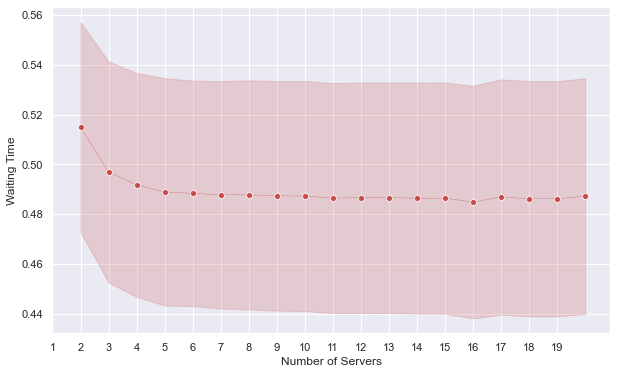

In [ ]:
plt.figure(figsize=(10, 6))
sns.lineplot(x=df_melted.index, y='Average Waiting Time', data=df_melted, marker='o', errorbar="sd", linewidth=0.3, color="#c94c4c")
#plt.title("Waiting Time per Server for Different Number of Servers")
plt.xlabel("Number of Servers")
plt.ylabel("Waiting Time")
plt.xticks(np.arange(1, 20, 1))
plt.show()

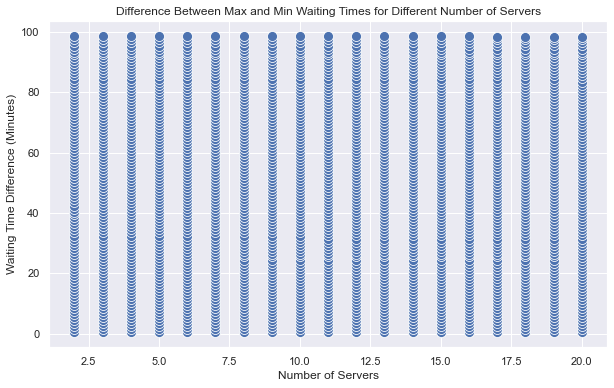

In [ ]:
waiting_time_diff = df_melted.max(axis=1) - df_melted.min(axis=1)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_melted.index, y=waiting_time_diff, s=100)
#sns.scatterplot(x=range(1, len(waiting_time_diff)+1), y=waiting_time_diff, color='skyblue', s=100)
plt.title("Difference Between Max and Min Waiting Times for Different Number of Servers")
plt.xlabel("Number of Servers")
plt.ylabel("Waiting Time Difference (Minutes)")
#plt.xticks(range(1, len(waiting_time_diff)+1))  # Set x-axis ticks to actual number of servers
plt.show()